## Going towards neural networks

In search of more complex models, we decided to also go towards neural networks.
In binary classification, the input data typically flows through the layers of the model in a sequential manner, from the input layer to the output layer. The Sequential API is specifically designed for building models where the data flows sequentially through the layers, making it a natural choice for binary classification tasks.
We found it by going through the library's documentation and thought it would be a good idea to implement it.

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
# Import data
def get_data():
    url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
    data = pd.read_csv(url)
    data = data.dropna()
    return data

In [3]:
# Load the data
data = get_data()

# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

#### Defining the model

Here's a breakdown of what each section does:

* Model 1:
This model has three layers: an input layer with 16 units and ReLU activation, a hidden layer with 16 units and ReLU activation, and an output layer with 1 unit and sigmoid activation.
* Model 2:
This model is similar to Model 1 but with an additional hidden layer.
The second hidden layer has 32 units and ReLU activation, while the rest of the layers remain the same.
* Model 3:
In this model, the number of units in the existing layers is increased to 32.
The first hidden layer now has 32 units, and the second hidden layer also has 32 units, while the output layer remains the same.
* Model 4:
Model 4 maintains the same architecture as Model 1 but changes the activation function.
The activation function in both hidden layers is now set to "tanh," which is the hyperbolic tangent function, while the output layer still uses the sigmoid activation.

These variations in the model configurations allow for experimentation and exploration of different architectural choices, such as layer depth, number of units, and activation functions. By testing these different models, you can observe how the changes affect the model's capacity to learn and its performance on a given task.

In [4]:
# build a model
def create_model1():
    model1 = Sequential()
    model1.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.summary() 
    return model1

def create_model2():
    model2 = Sequential()
    model2.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
    model2.add(Dense(32, activation='relu'))  # Add an additional hidden layer
    model2.add(Dense(16, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.summary()
    return model2

def create_model3():
    model3 = Sequential()
    model3.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))  # Increase units to 32
    model3.add(Dense(32, activation='relu'))  # Increase units to 32
    model3.add(Dense(1, activation='sigmoid'))
    model3.summary()
    return model3


def create_model4():
    model4 = Sequential()
    model4.add(Dense(16, input_shape=(X.shape[1],), activation='tanh'))  # Use 'tanh' activation
    model4.add(Dense(16, activation='tanh'))
    model4.add(Dense(1, activation='sigmoid'))
    model4.summary()
    return model4

model1 = create_model1()
model2 = create_model2()
model3 = create_model3()
model4 = create_model4()

# compile the model
model1.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model4.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3440      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,729
Trainable params: 3,729
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                3440      
                                                                 
 dense_4 (Dense)             (No

### Training the models 

During the training process, the models learn from the input data (X) and the corresponding target labels (y). The models optimize their internal parameters using the Adam optimizer, minimize the binary cross-entropy loss, and monitor the accuracy metric.

The early stopping callback (es) is included to stop the training process if there is no improvement in validation accuracy for 10 consecutive epochs. By monitoring the validation accuracy, the callback helps prevent overfitting and allows the models to stop training early if they start to plateau in performance.

The training histories (history1, history2, history3, history4) store information about the training progress, such as the loss and accuracy values for each epoch. This information can be used for analysis, visualization, and evaluating the models' performance.

In [5]:
history1 = model1.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
1318/1318 [==============================] - 4s 3ms/step - loss: 2.6913 - accuracy: 0.5684 - val_loss: 3.0687 - val_accuracy: 0.3682
Epoch 2/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.6532 - accuracy: 0.5940 - val_loss: 1.3011 - val_accuracy: 0.6600
Epoch 3/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.4103 - accuracy: 0.6119 - val_loss: 1.7893 - val_accuracy: 0.6664
Epoch 4/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.2732 - accuracy: 0.6177 - val_loss: 4.4051 - val_accuracy: 0.6512
Epoch 5/80
1318/1318 [==============================] - 2s 2ms/step - loss: 1.2334 - accuracy: 0.6221 - val_loss: 1.7616 - val_accuracy: 0.6697
Epoch 6/80
1318/1318 [==============================] - 2s 2ms/step - loss: 1.0878 - accuracy: 0.6308 - val_loss: 1.3583 - val_accuracy: 0.6512
Epoch 7/80
1318/1318 [==============================] - 2s 2ms/step - loss: 1.1384 - accuracy: 0.6334 - val_loss: 3.6345 - val_accuracy:

In [6]:
history2 = model2.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
1318/1318 [==============================] - 5s 3ms/step - loss: 2.4478 - accuracy: 0.5728 - val_loss: 4.4740 - val_accuracy: 0.3534
Epoch 2/80
1318/1318 [==============================] - 6s 4ms/step - loss: 1.2317 - accuracy: 0.5878 - val_loss: 0.9702 - val_accuracy: 0.4147
Epoch 3/80
1318/1318 [==============================] - 5s 4ms/step - loss: 0.9765 - accuracy: 0.5999 - val_loss: 3.4720 - val_accuracy: 0.6512
Epoch 4/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.8030 - accuracy: 0.6137 - val_loss: 0.8184 - val_accuracy: 0.4478
Epoch 5/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.7088 - accuracy: 0.6331 - val_loss: 0.5737 - val_accuracy: 0.7131
Epoch 6/80
1318/1318 [==============================] - 5s 4ms/step - loss: 0.6637 - accuracy: 0.6491 - val_loss: 1.0221 - val_accuracy: 0.4502
Epoch 7/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6676 - accuracy: 0.6488 - val_loss: 0.8832 - val_accuracy:

In [7]:
history3 = model3.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
1318/1318 [==============================] - 3s 2ms/step - loss: 3.4612 - accuracy: 0.5639 - val_loss: 7.8890 - val_accuracy: 0.6512
Epoch 2/80
1318/1318 [==============================] - 3s 2ms/step - loss: 2.0840 - accuracy: 0.5890 - val_loss: 1.6726 - val_accuracy: 0.3749
Epoch 3/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.9285 - accuracy: 0.5948 - val_loss: 0.8193 - val_accuracy: 0.6897
Epoch 4/80
1318/1318 [==============================] - 6s 4ms/step - loss: 1.5897 - accuracy: 0.6112 - val_loss: 3.1227 - val_accuracy: 0.3774
Epoch 5/80
1318/1318 [==============================] - 5s 3ms/step - loss: 1.5481 - accuracy: 0.6180 - val_loss: 1.0037 - val_accuracy: 0.5589
Epoch 6/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.4838 - accuracy: 0.6257 - val_loss: 3.9661 - val_accuracy: 0.6512
Epoch 7/80
1318/1318 [==============================] - 3s 2ms/step - loss: 1.1040 - accuracy: 0.6392 - val_loss: 3.0761 - val_accuracy:

In [8]:
history4 = model4.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6632 - accuracy: 0.6283 - val_loss: 0.6449 - val_accuracy: 0.6512
Epoch 2/80
1318/1318 [==============================] - 2s 2ms/step - loss: 0.6600 - accuracy: 0.6312 - val_loss: 0.6521 - val_accuracy: 0.6512
Epoch 3/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6593 - accuracy: 0.6297 - val_loss: 0.6480 - val_accuracy: 0.6512
Epoch 4/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6589 - accuracy: 0.6308 - val_loss: 0.6534 - val_accuracy: 0.6512
Epoch 5/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6586 - accuracy: 0.6308 - val_loss: 0.6455 - val_accuracy: 0.6512
Epoch 6/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6574 - accuracy: 0.6305 - val_loss: 0.6485 - val_accuracy: 0.6512
Epoch 7/80
1318/1318 [==============================] - 3s 2ms/step - loss: 0.6583 - accuracy: 0.6315 - val_loss: 0.6469 - val_accuracy:

### Intermediate results

We use learning curves to look at our results. We can see that model 1 and model 3 perform well comparing to model 2 and 4. 

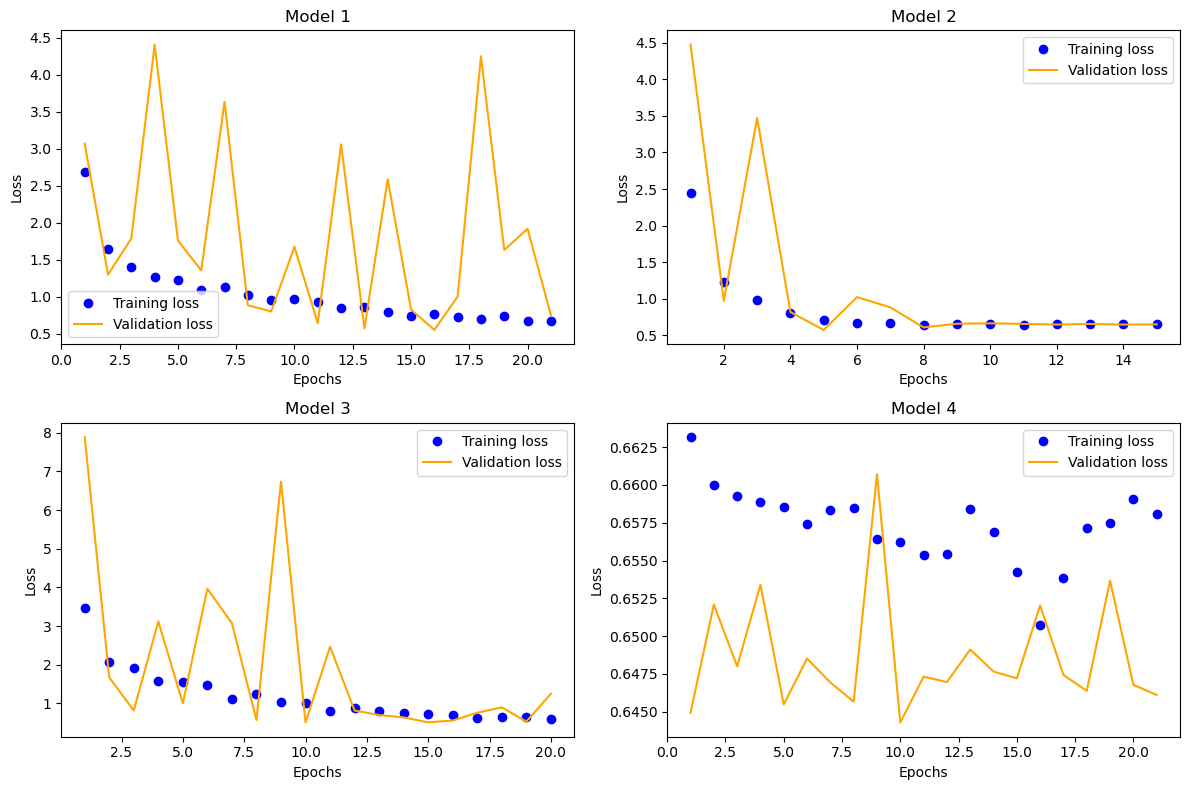

In [9]:
# Create subplots for multiple graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each model's history
for i, (history, model_name) in enumerate([(history1, 'Model 1'), (history2, 'Model 2'), (history3, 'Model 3'), (history4, 'Model 4')]):
    # Learning curve (Loss)
    # Retrieve the training and validation loss values
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    
    # Range of X (number of epochs)
    epochs = range(1, len(loss_values) + 1)
    
    # Plot the training and validation loss for the current model
    ax = axs[i//2, i%2]
    ax.plot(epochs, loss_values, 'bo', label='Training loss')
    ax.plot(epochs, val_loss_values, 'orange', label='Validation loss')
    ax.set_title(model_name)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with all four graphs
plt.show()


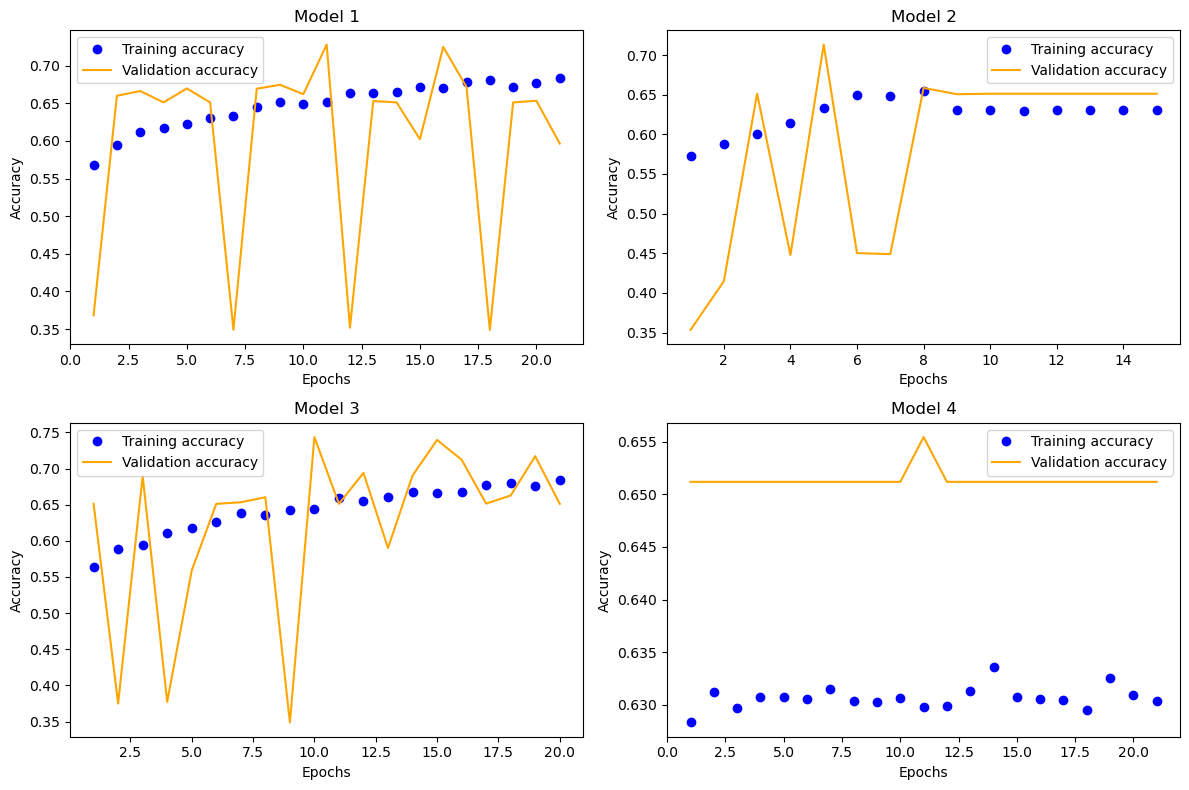

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [10]:
# Create subplots for multiple graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each model's history
for i, (history, model_name) in enumerate([(history1, 'Model 1'), (history2, 'Model 2'), (history3, 'Model 3'), (history4, 'Model 4')]):
    # Learning curve (Accuracy)
    # Retrieve the training and validation accuracy values
    acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']
    
    # Range of X (number of epochs)
    epochs = range(1, len(acc_values) + 1)
    
    # Plot the training and validation accuracy for the current model
    ax = axs[i//2, i%2]
    ax.plot(epochs, acc_values, 'bo', label='Training accuracy')
    ax.plot(epochs, val_acc_values, 'orange', label='Validation accuracy')
    ax.set_title(model_name)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot with all four graphs
plt.show()

# Maximum validation accuracy
max_val_acc = np.max([history.history['val_accuracy'] for history in [history1, history2, history3, history4]])
print("Maximum validation accuracy:", max_val_acc)


In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Iterate over each model
for i, (model, model_name) in enumerate([(model1, 'Model 1'), (model2, 'Model 2'), (model3, 'Model 3'), (model4, 'Model 4')]):
    # Predict probabilities and round to 0 or 1
    preds = np.round(model.predict(X), 0)
    
    # Generate confusion matrix
    cm = confusion_matrix(y, preds)
    
    # Print confusion matrix
    print(f"{model_name} Confusion Matrix:")
    print(cm)
    print()
    
    # Generate and print classification report
    report = classification_report(y, preds)
    print(f"{model_name} Classification Report:")
    print(report)
    print("-" * 40)
    print()